# Task number 1


In [ ]:
from sklearn import svm,datasets

In [2]:
iris=datasets.load_iris()

In [3]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
37,4.9,3.6,1.4,0.1
113,5.7,2.5,5.0,2.0
51,6.4,3.2,4.5,1.5
17,5.1,3.5,1.4,0.3
65,6.7,3.1,4.4,1.4


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df['Flower']=iris.target
df['Flower']=df['Flower'].apply(lambda x:iris.target_names[x])
df[74:95:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
74,6.4,2.9,4.3,1.3,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
78,6.0,2.9,4.5,1.5,1,versicolor
80,5.5,2.4,3.8,1.1,1,versicolor
82,5.8,2.7,3.9,1.2,1,versicolor
84,5.4,3.0,4.5,1.5,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor
88,5.6,3.0,4.1,1.3,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor
92,5.8,2.6,4.0,1.2,1,versicolor


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0=df[df.target==1]
df1=df[df.target==2]
df2=df[df.target==3]

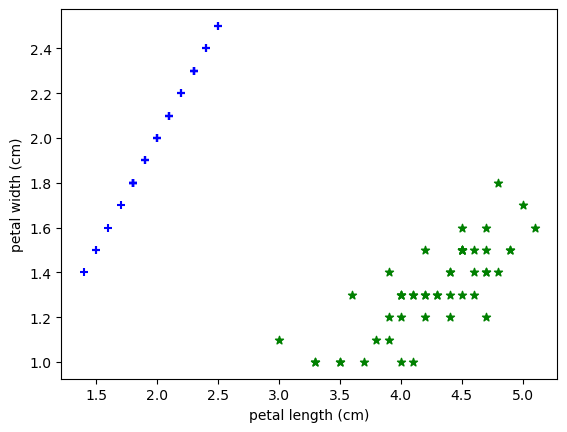

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot a graph on the basis of petal
plt.xlabel('petal length (cm)' )
plt.ylabel('petal width (cm)' )
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c="green",marker="*")
plt.scatter(df1['petal width (cm)'],df1['petal width (cm)'],c="blue",marker="+")                                         


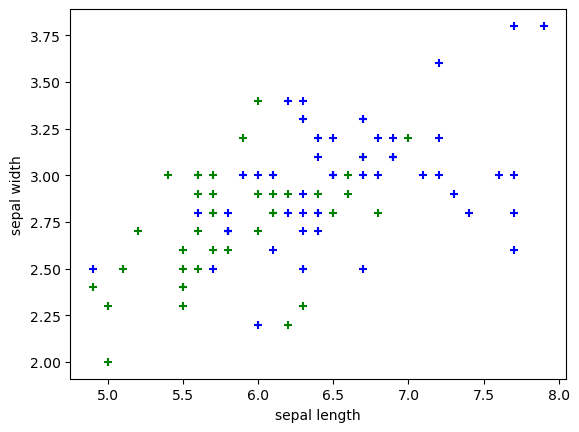

In [12]:
#plot a graph on the basis of sepal
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(df0['sepal length (cm)'],df0["sepal width (cm)"],c='green',marker="+")
plt.scatter(df1['sepal length (cm)'],df1["sepal width (cm)"],c='blue',marker="+")

By using GridSearchCV TO find best parameter for data set by using svc

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

To find a best model and parameter for model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [16]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,5,10],
            'kernel':['rbf','linear'],
            'degree':[2,3,5,6,7,10],
        }
    },
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            "n_estimators":[10,15,20,25],
            "criterion" : ["gini", "entropy"]            
        }
    },
    "logistic regression":{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            "C":[1,15,20],
            
        }
    },
     "DecisionTreeClassifier":{
         'model': DecisionTreeClassifier(),
         'params':{
             'criterion':['gini','entropy']
            
         }
     
     },
    "GaussianNB":{
        'model':GaussianNB(),
        'params':{}
    },
     "MultinomialNB":{
         'model': MultinomialNB(),
         'params':{}
     }
    
    
    
}

In [17]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [18]:
df1 = pd.DataFrame(scores,columns=['model','best_score',  'best_params'])
df1

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'degree': 2, 'kernel': 'rbf'}"
1,random forest,0.966667,"{'criterion': 'gini', 'n_estimators': 25}"
2,logistic regression,0.966667,{'C': 15}
3,DecisionTreeClassifier,0.966667,{'criterion': 'gini'}
4,GaussianNB,0.953333,{}
5,MultinomialNB,0.953333,{}


further analysis and evaluation of all models we got svm is best model by using {'C': 1, 'degree': 2, 'kernel': 'rbf'} is params and we got 98%  higher accuracy for model

In [19]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
60,5.0,2.0,3.5,1.0,1,versicolor
112,6.8,3.0,5.5,2.1,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa
129,7.2,3.0,5.8,1.6,2,virginica
50,7.0,3.2,4.7,1.4,1,versicolor


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
x=df.drop(['target','Flower'],axis=1)
y=df.target

applay train_test_split on data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
len(x_train)

120

In [25]:
len(y_train)

120

In [26]:
from sklearn.svm import SVC

In [27]:
from sklearn.svm import SVC
model = SVC( C=1.0,degree=2,kernel='rbf')
model.fit(x_train, y_train)

SVC(degree=2)

In [28]:
model.score(x_train,y_train)

0.975

In [29]:
model.predict([['4.9','3.0','1.4','0.2']])

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [30]:
model.predict([['5.0','2.0','3.5','1.0']])

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])